In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creamos la matriz A y su inversa
A = np.diag(4*np.ones(9)) + np.diag(-1*np.ones(8), 1) + np.diag(-1*np.ones(8), -1)
A[0,0] = 2
Ainv = np.linalg.inv(A)

# Condición inicial
C = np.array([76.1, 40, 40, 40, 40, 40, 40, 40, 60])

# Recursion en el tiempo (5 veces)
D = np.zeros((9, 5))
for i in range(5):
    D[:, i] = np.dot(Ainv, C)
    C = np.empty(9)
    C[0] = 56.1 + D[0, i]
    C[1:8] = 2*D[1:8, i]
    C[8] = 2*D[8, i] + 20

(9, 6)


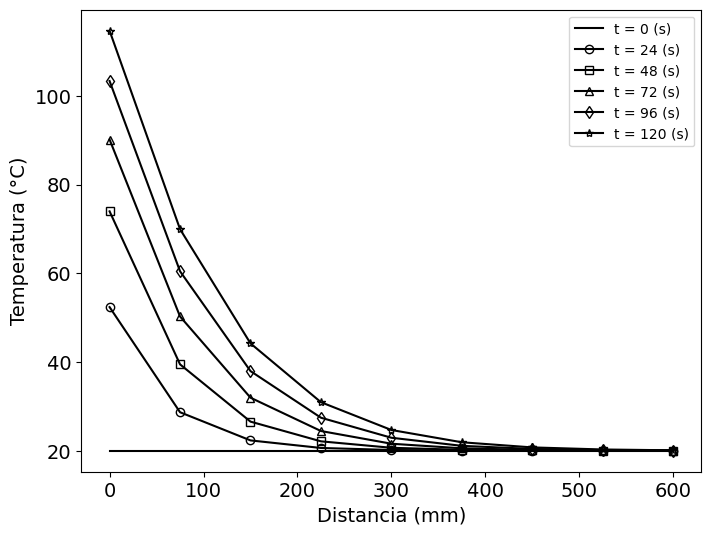

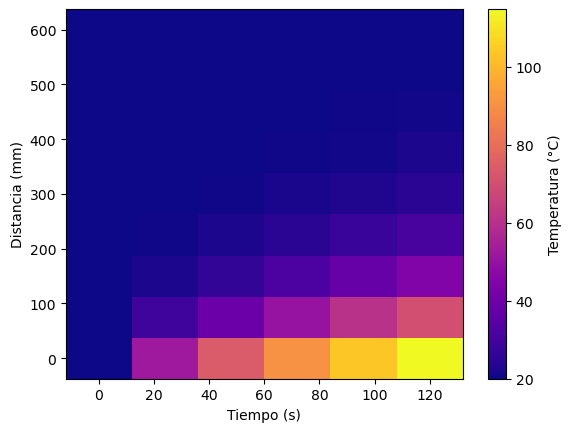

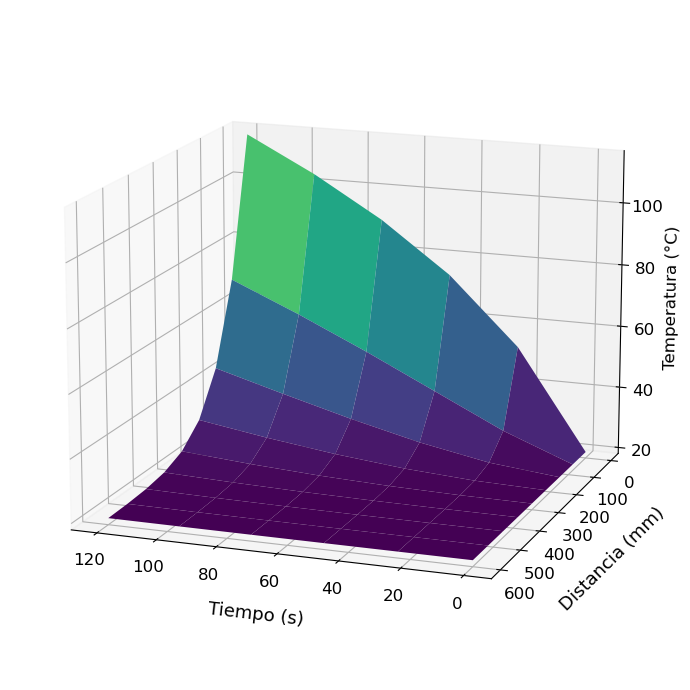

In [4]:
# FIGURAS
# Preparamos los datos para los ejes
pos = np.arange(0, 601, 75)  # mm
tpo = np.arange(0, 121, 24)  # sec
C0 = 20*np.ones(9)

plt.figure(1, figsize=(8,6))
plt.plot(pos, C0, 'k', label='t = 0 (s)')
markers = ['o', 's', '^', 'd', '*']
for i in range(5):
    plt.plot(pos, D[:,i], color='k', marker=markers[i], fillstyle='none', label=f't = {24*(i+1)} (s)')
plt.xlabel('Distancia (mm)', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=10)

# Figuras 2 y 3
X, Y = np.meshgrid(tpo, pos)
Z = np.column_stack((C0, D))
print(Z.shape)

# Gráfico 2D: Mapa calor 
plt.figure(2)
plt.pcolormesh(X, Y, Z, cmap='plasma',vmin=np.nanmin(Z), vmax=np.nanmax(Z)) # cmap='gray' o 'coolwarm', shading='auto'
plt.colorbar(label='Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (mm)')

# Gráfico 3D
fig = plt.figure(3,figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_xlabel('Tiempo (s)', fontsize=13, labelpad=12)
ax.set_ylabel('Distancia (mm)', fontsize=13, labelpad=12)
ax.set_zlabel('Temperatura (°C)', fontsize=12)
ax.view_init(azim=110, elev=15) # Roto la vista
plt.tick_params(axis='both', labelsize=12)
fig.tight_layout()

plt.show()